<a href="https://colab.research.google.com/github/onssaadallah/Taxi-Demand-Prediction/blob/main/Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create an Automated Model Selection with 3 methodes

**Import Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


**Import Package**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Load the three Models to creat the automated Model selection**

In [ ]:
LSTM=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Taxi Demand/Taxi Demand Prediction/LSTM/predictions_LSTM_Model.csv')
ARIMA=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Taxi Demand/Taxi Demand Prediction/ARIMA/predictions_ARIMA_Model.csv')
Poisson=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Taxi Demand/Taxi Demand Prediction/Time-varying Poisson model/predictions_poisson_Model.csv')

In [ ]:
#get the prediction  and real values from each model
predictions1=Poisson['predictions'].values
predictions2=LSTM['predictions'].values
predictions3=ARIMA['predictions'].values
realvalues=Poisson['realvalues'].values

In [ ]:
import numpy as np

def smape(A, F):
    return 1/len(A) * np.sum( np.abs(F - A) / (np.abs(A) + np.abs(F)+1))

#Model Selection1

The first method of the Model Selection is to define a window of periods of real values and predictions then we calculate the SMAPE error for each model .At the first window we select the model that has the lowest SMAPE error to predict a number of taxi demand in the next window=8 .If the SMAPE error of the selected model increase more than the SMAPE of the other models, we switch to  the model with the lowest error.

In [ ]:
prec1=[]
prec2=[]
prec3=[] 
real=[]
i=0
k=0
s=0
n=0
while (i<len(predictions1)):
    prec1.append(predictions1[i:i+8])
    i=i+8
print(prec1)    
while (k<len(predictions2)):
    prec2.append(predictions2[k:k+8])
    k=k+8
print(prec2)    
while (s<len(predictions3)):
    prec3.append(predictions3[s:s+8])
    s=s+8
print(prec3)
while (n<len(realvalues)):
    real.append(realvalues[n:n+8])
    n=n+8     

[array([2, 3, 1, 1, 1, 0, 0, 0]), array([0, 1, 0, 1, 1, 1, 1, 1]), array([1, 4, 2, 4, 2, 2, 2, 9]), array([4, 8, 2, 8, 3, 4, 3, 8]), array([ 4,  7,  3,  9,  6, 13,  6, 13]), array([ 9, 13,  4, 12,  3,  6,  2,  5]), array([3, 3, 1, 1, 0, 0, 0, 0]), array([1, 0, 0, 1, 1, 2, 3, 9]), array([ 4, 16,  8, 17, 12,  9,  6, 12]), array([ 7, 10,  4, 13,  5,  8,  5, 10]), array([ 4,  7,  2,  9,  4,  8,  3, 10]), array([ 5, 10,  2,  7,  1,  3,  1,  3]), array([1, 2, 1, 0, 0, 0, 0, 0]), array([0, 0, 0, 1, 1, 1, 2, 7]), array([ 4, 15,  5, 16,  8,  7,  5, 11]), array([ 6,  7,  3, 11,  5,  6,  2,  7]), array([ 6,  6,  3,  8,  4, 10,  3,  9]), array([4, 8, 2, 7, 2, 3, 1, 3]), array([1, 2, 1, 0, 0, 0, 0, 0]), array([0, 1, 0, 1, 2, 2, 2, 7]), array([ 3, 15,  5, 19,  8,  7,  5, 12]), array([ 4,  8,  3, 11,  6,  7,  2,  9]), array([ 4,  6,  2,  9,  4, 12,  3, 10]), array([4, 9, 2, 7, 2, 3, 1, 3]), array([1, 2, 1, 0, 0, 0, 0, 0]), array([0, 1, 0, 1, 1, 1, 2, 7]), array([ 4, 14,  6, 18,  9,  8,  5, 12]), arra

In [ ]:
s1=smape(real[0],prec1[0])

s2=smape(real[0],prec2[0])

s3=smape(real[0],prec3[0])


In [ ]:
smp=[]
smp.append(s1)
smp.append(s2)
smp.append(s2)

In [ ]:

liste=[]
for w in range(1,294):
    if (smp.index(min(smp))==0):
        print('poisson is the best model:'+str(sm1))
        print(prec1[w])
        liste.append(prec1[w])
    elif (smp.index(min(smp))==1):
        print('LSTM is the best model:'+str(s2))
        print(prec2[w])
        liste.append(prec2[w])
      
    else:
        print('ARIMA is the best model:'+str(sm3))
        print(prec3[w])
        liste.append(prec3[w])
    smp=[]
             
    sm1=smape(real[w-1],prec1[w-1])
    sm2=smape(real[w-1],prec2[w-1])
    sm3=smape(real[w-1],prec3[w-1])
    smp.append(sm1)
    smp.append(sm2)
    smp.append(sm2)
    




    


    

LSTM is the best model:0.14583333333333331
[1. 1. 0. 0. 2. 4. 5. 2.]
LSTM is the best model:0.14583333333333331
[2. 0. 2. 4. 3. 3. 1. 3.]
poisson is the best model:0.3125
[4 8 2 8 3 4 3 8]
poisson is the best model:0.3604166666666666
[ 4  7  3  9  6 13  6 13]
poisson is the best model:0.38660714285714287
[ 9 13  4 12  3  6  2  5]
poisson is the best model:0.25083269671504965
[3 3 1 1 0 0 0 0]
LSTM is the best model:0.14583333333333331
[ 3.  3.  4.  6.  5.  5.  9. 12.]
poisson is the best model:0.28125
[ 4 16  8 17 12  9  6 12]
poisson is the best model:0.2586538461538461
[ 7 10  4 13  5  8  5 10]
poisson is the best model:0.3372314200262978
[ 4  7  2  9  4  8  3 10]
LSTM is the best model:0.14583333333333331
[9. 0. 6. 2. 1. 1. 1. 0.]
poisson is the best model:0.3866666666666667
[1 2 1 0 0 0 0 0]
poisson is the best model:0.47006578947368416
[0 0 0 1 1 1 2 7]
LSTM is the best model:0.14583333333333331
[ 7.  3.  7.  5.  5.  5. 14.  4.]
poisson is the best model:0.159375
[ 6  7  3 11  5  

In [ ]:
#Gathering all the Model Selection1 model predections in the list call model_predictions1.
model_predictions1=[]
for i in range(len(liste)):
    for j in range(8):
        model_predictions1.append(liste[i][j])

        

**Model Evaluation**

In [ ]:
smape(realvalues[:2344],model_predictions1)

0.437076196743896

**Model Visualization**

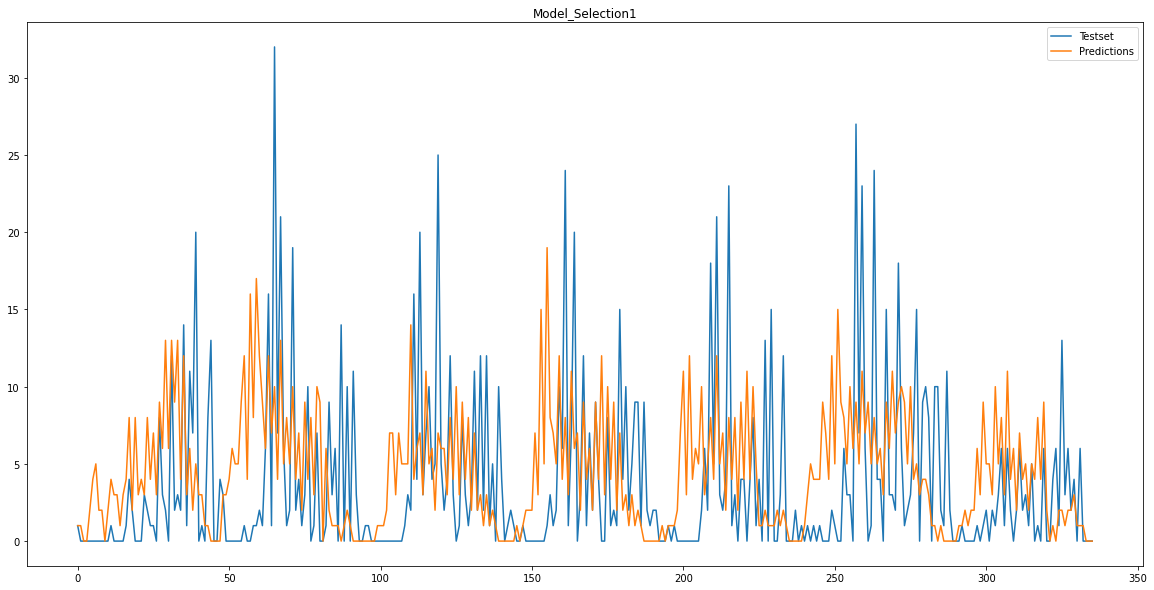

In [ ]:

plt.figure(figsize=(20,10))
plt.plot(realvalues[:336],label='Testset')
plt.plot(model_predictions1[:336],label='Predictions')
plt.legend(loc='best')
plt.title("Model_Selection1")
plt.show()

# Model Selection 2

Model Selection 2 based on method called an ensemble method that  reduces the model that has the highest  error.





In [ ]:

def ensemble(H,pr,predictions1,predictions2,predictions3,liste):
    
    for y in range(H):
        real1=realvalues[pr-H-1+y]
        pred1=predictions1[1:pr-H-1+y]
        pred2=predictions2[1:pr-H-1+y]
        pred3=predictions3[1:pr-H-1+y]
        ro1=sum(abs(pred1-real1)/(pred1+real1+1))/H
        ro2=sum(abs(pred2-real1)/(pred2+real1+1))/H
        ro3=sum(abs(pred3-real1)/(pred3+real1+1))/H
        gama=(1-ro1)+(1-ro2)+(1-ro3)
        r=round((predictions1[pr]*(1-ro1)+predictions2[pr]*(1-ro2)+predictions3[pr]*(1-ro3))/gama)
        liste.append(r)
        return r 

In [ ]:
model_prediction2=[]
for pr in range(len(realvalues)):
    ensemble(8,pr,predictions1,predictions2,predictions3,model_prediction2)

In [ ]:
#set all negative values with 0
for i in range(len(model_prediction2)):
    if (model_prediction2[i]<0):
        model_prediction2[i]=0

**Model Evaluation**

In [ ]:
smape(realvalues,liste)

0.41475402904574393

**Model Visualization**

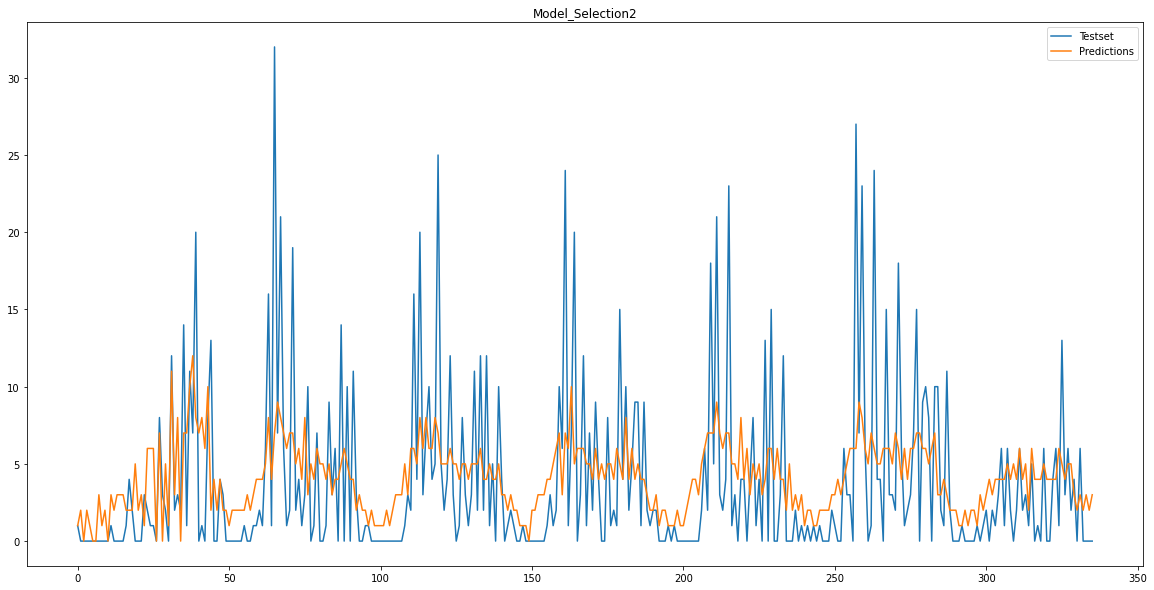

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(realvalues[:336],label='Testset')
plt.plot(model_prediction2[:336],label='Predictions')
plt.legend(loc='best')
plt.title("Model_Selection2")
plt.show()

# Model Selection3

The third method is based on the evaluation of the three models on a selected part of the data using the SAME as evaluation metrics. So based on this evaluation we select the performance model.

In [ ]:
#select a part of a data in validationset
valid=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Taxi Demand/Taxi Demand Prediction/Demand.csv')
validation=valid['V15'].values[:2352]

In [ ]:
liste=[]
S1=smape(validation,predictions1)
liste.append(S1)

S2=smape(validation,predictions2)
liste.append(S2)

S3=smape(validation,predictions3)
liste.append(S3)

if (liste.index(min(liste))==0):
    print("Poisson is the best Model")
    print("Poisson Model: "+str(S1))
elif (liste.index(min(liste))==1):
    print("LSTM is the best Model")
    print("ARIMA Model: "+str(S2))
else:
    print("ARIMA is the best Model")
    print("ARIMA Model: "+str(S2))


Poisson is the best Model
Poisson Model: 0.33226296500081726


**Model Evaluation**

In [ ]:
smape(realvalues,predictions1)

0.30738625564185895

**Model Visualization**

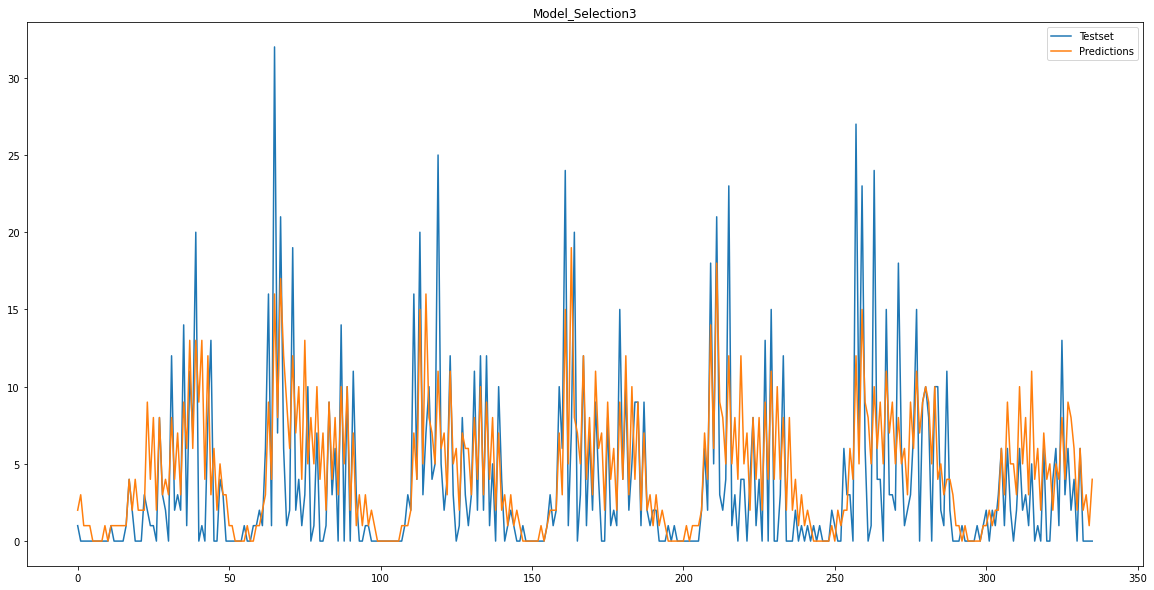

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(realvalues[:336],label='Testset')
plt.plot(predictions1[:336],label='Predictions')
plt.legend(loc='best')
plt.title("Model_Selection3")
plt.show()